This notebook file evaluates the new discretisation on the underdamped Langevin SDE, following the section 3.4 in the paper. Specifically,

- The **'Task 1'** checks the computation of $\psi_1(t)$ and $\psi_2(t)$ corresponding to equation (3.36) and (3.37), and the following covariance matrix $\mathbf C$.  

- The **'Task 2'** computes the mean and variance for the chain of our new discretisation showing in equation (3.39). This task is related to the equation (3.41) to (3.43) in the paper, where we would have a MemoryError when calculating the variance.

- The **'Task 3'** implements the sampling performance of the new discretisation with Markov chain plot and the histogram along with the target density function. We could apply different stepsizes $\gamma$ and different sample size in code provided for evaluation. This task is related to Figure 3.8 to Figure 3.10 in the paper.

## Task 1

In [1]:
import sympy as sp

In [2]:
# Derivation of psi_1
from sympy import symbols, integrate, exp

# Step 1: Define the symbols
eta, s, t = symbols('eta s t')

# Step 2: Define the integrand
integrand = exp(-eta * s)

# Step 3: Compute the integral
integral_result = integrate(integrand, (s, 0, t))

# Step 4: Display the result
sp.simplify(integral_result)

Piecewise((1/eta - exp(-eta*t)/eta, ((eta > -oo) | (eta > 0)) & ((eta > -oo) | (eta < oo)) & ((eta > 0) | (eta < 0)) & ((eta < 0) | (eta < oo))), (t, True))

In [3]:
# Derivation of psi_2
from sympy import symbols, integrate, exp

# Step 1: Define the symbols
eta, s, t = symbols('eta s t')

# Step 2: Define the integrand
integrand = - (1 / eta) * (exp(-eta * s) - 1)

# Step 3: Compute the integral
integral_result = integrate(integrand, (s, 0, t))

# Step 4: Display the result
sp.simplify(integral_result)

Piecewise(((t - 1/eta + exp(-eta*t)/eta)/eta, ((eta > -oo) | (eta > 0)) & ((eta > -oo) | (eta < oo)) & ((eta > 0) | (eta < 0)) & ((eta < 0) | (eta < oo))), (0, True))

In [4]:
# Check the variance matrix C, 1,1-entry
import sympy as sp

# Define the symbols
gamma, t = sp.symbols('gamma t')

# Define the integrand
integrand = (sp.exp(-gamma * t))**2

# Perform the integration
result = sp.integrate(integrand, (t, 0, gamma))

# Simplify the result
simplified_result = sp.simplify(result)

# Display the result
simplified_result

Piecewise((1/(2*gamma) - exp(-2*gamma**2)/(2*gamma), ((gamma > -oo) | (gamma > 0)) & ((gamma > -oo) | (gamma < oo)) & ((gamma > 0) | (gamma < 0)) & ((gamma < 0) | (gamma < oo))), (gamma, True))

In [5]:
# Check the variance matrix C, 1,2-entry (also 2,1-entry)
import sympy as sp

# Define the symbols
gamma, t = sp.symbols('gamma t')

# Define the integrand
integrand = -(1/gamma) * (sp.exp(-gamma * t)) * (sp.exp(-gamma * t) - 1)

# Perform the integration
result = sp.integrate(integrand, (t, 0, gamma))

# Simplify the result
simplified_result = sp.simplify(result)

# Display the result
simplified_result

Piecewise(((exp(2*gamma**2) - 2*exp(gamma**2) + 1)*exp(-2*gamma**2)/(2*gamma**2), ((gamma > -oo) | (gamma > 0)) & ((gamma > -oo) | (gamma < oo)) & ((gamma > 0) | (gamma < 0)) & ((gamma < 0) | (gamma < oo))), (0, True))

In [6]:
# Check the variance matrix C, 2,2-entry

# Define the symbols
gamma, t = sp.symbols('gamma t')

# Define the integrand
integrand = (1 / gamma**2) * (sp.exp(-gamma * t) - 1)**2

# Perform the integration
result = sp.integrate(integrand, (t, 0, gamma))

# Simplify the result
simplified_result = sp.simplify(result)

# Display the result
simplified_result

Piecewise((1/gamma - 3/(2*gamma**3) + 2*exp(-gamma**2)/gamma**3 - exp(-2*gamma**2)/(2*gamma**3), ((gamma > -oo) | (gamma > 0)) & ((gamma > -oo) | (gamma < oo)) & ((gamma > 0) | (gamma < 0)) & ((gamma < 0) | (gamma < oo))), (0, True))

## Task 2

Derivation of the mean of the sequence.

In [11]:
import sympy as sp

# Define the symbols
gamma, eta, sigma, mu = sp.symbols('gamma eta sigma mu')

psi_0 = sp.exp(-eta * gamma)
psi_1 = -1/eta * (sp.exp(-eta * gamma) - 1)
psi_2 = 1/(eta**2) * (sp.exp(-eta * gamma) - 1) + gamma / eta

I = sp.eye(2)
A_simplified = sp.simplify(sp.Matrix([[psi_0, -psi_1/(sigma**2)], [psi_1, 1 - psi_2/(sigma ** 2)]]))
result_matrix_simplifed = sp.simplify((I - A_simplified).inv())  # (I-A) inverse

b = sp.simplify(sp.Matrix([psi_1 * mu/sigma**2, psi_2 * mu/sigma**2]))

sp.simplify(result_matrix_simplifed * b)  # mean result

Matrix([
[ 0],
[mu]])

Derivation of the variance $s_0$ of the sequence, by using **vec** operator.

In [ ]:
# Codes for calculate the vec(s0)
from sympy import symbols, Matrix, eye, simplify
from sympy.matrices import kronecker_product

# Define symbolic variables
gamma, eta, sigma, mu = symbols('gamma eta sigma mu')

# Calculate the Kronecker product of A and A
B = kronecker_product(A_simplified, A_simplified)  # use A_simplified defined above

# Identity matrix
I = eye(4)

# Calculate the inverse of I - B symbolically
inverse_I_minus_B = simplify((I - B).inv())

vec_C = Matrix([1/(2 * gamma) * (1 - sp.exp(-2*gamma**2)), 1/(2*gamma**2) * (1-sp.exp(-gamma**2))**2, 
                1/(2*gamma**2) * (1-sp.exp(-gamma**2))**2, 1/gamma - 1/(2*gamma**3) * (sp.exp(-gamma**2) - 3) * (sp.exp(-gamma**2) - 1)])

vec_s0 = 2 * eta * inverse_I_minus_B * vec_C
simplify(vec_s0)

# MemoryError occurs due to very complicated computation!

## Task 3

Underdamped Langevin new discritisation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

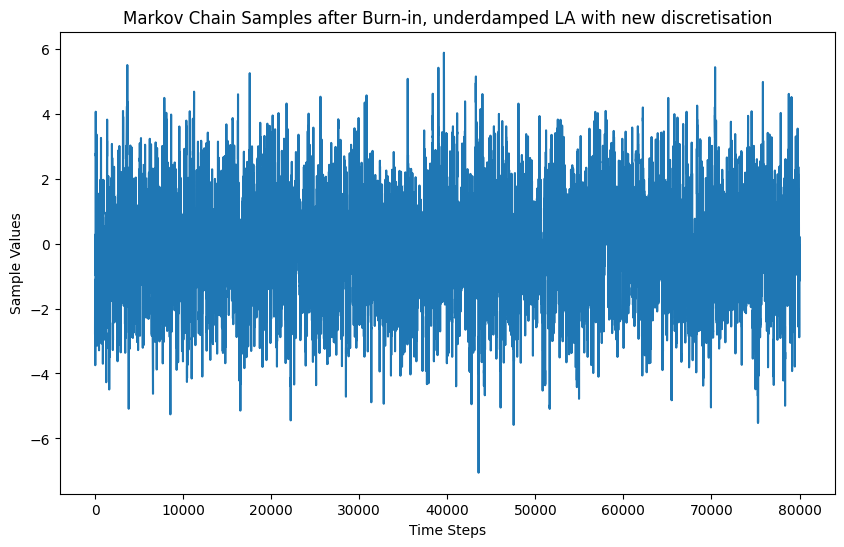

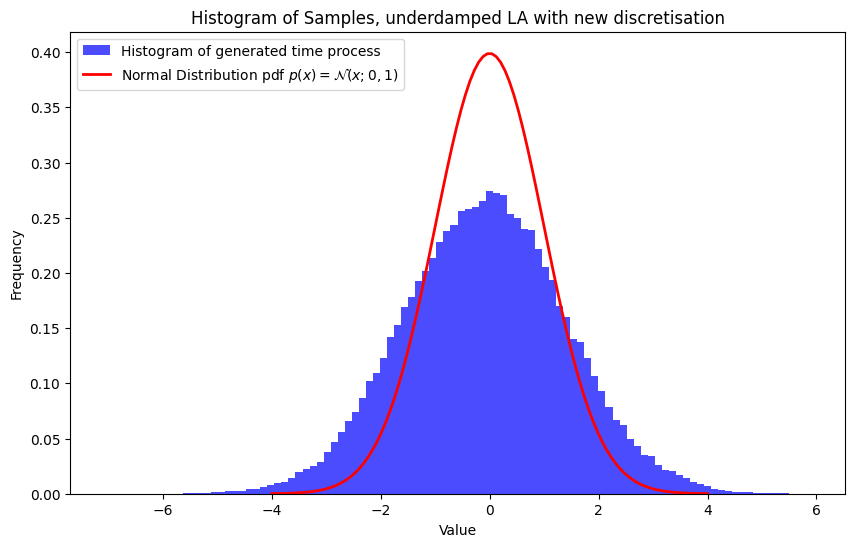

In [16]:
np.random.seed(42)

sample_size = 100000  # sample size N
z0 = [1,1]  # initial value z0
burnin = 20000

z_arr = np.zeros((sample_size,2))  # create z_arr for containing total N samples, the i-th row is z_i = (v_i, x_i), for i=0,1,...,N-1
z_arr[0, :] = z0  # substitution with the initial entry

gamma = 0.2  # gamma as the step size, this should be chosen carefully
eta = 5  # this constant should also be chosen carefully but not randomly pick
mu = 0  # mean of the target p
sigma = 1  # std of the target p

psi_0 = np.exp(-eta * gamma)
psi_1 = -1/eta * (np.exp(-eta * gamma) - 1)
psi_2 = 1/(eta**2) * (np.exp(-eta * gamma) - 1) + gamma / eta

A = np.array([[psi_0, -psi_1/(sigma**2)], [psi_1, 1 - psi_2/(sigma ** 2)]])  # define the matrix A
b = np.array([psi_1 * mu/(sigma**2), psi_2 * mu/(sigma**2)])  # define the vector b

mean = [0, 0]  # Mean vector
cov_matrix = np.array([[1/(2 * gamma) * (1 - np.exp(-2*gamma**2)), 1/(2*gamma**2) * (1 - np.exp(-gamma**2))**2], 
                       [1/(2*gamma**2) * (1 - np.exp(-gamma**2))**2, 1/gamma - 1/(2*gamma**3) * (np.exp(-gamma**2) - 3) * (np.exp(-gamma**2) - 1)]])

# Apply the Underdamped Langevin diffusion here
for t in range(1, sample_size):
    z_prime = A @ z_arr[t-1, :] + b + np.sqrt(2 * eta) * np.random.multivariate_normal(mean, cov_matrix, 1)
    z_arr[t, :] = z_prime

plt.figure(figsize=(10,6))

plt.plot(z_arr[burnin: ,1])  # the second column is the samples for time process X_t, which is samples of p(x)
plt.title('Markov Chain Samples after Burn-in, underdamped LA with new discretisation')
plt.xlabel('Time Steps')
plt.ylabel('Sample Values')
plt.show()

# Plotting the histogram and the density function
x = np.linspace(-4,4,100)
pdf_normal = norm.pdf(x, loc = 0, scale = 1)  # N(0, 1) distribution

plt.figure(figsize=(10,6))
plt.hist(z_arr[burnin: ,1], bins=100, density=True, color='blue', alpha=0.7, label = 'Histogram of generated time process')
plt.plot(x, pdf_normal, color='red', lw=2, label='Normal Distribution pdf $p(x) = \mathcal{N}(x;0,1)$')
plt.title('Histogram of Samples, underdamped LA with new discretisation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()